# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [5]:
apple = data

### Step 4.  Check out the type of the columns

In [7]:
print(apple.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


### Step 5. Transform the Date column as a datetime type

In [8]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [9]:
apple.set_index('Date', inplace=True)

### Step 7.  Is there any duplicate dates?

In [11]:
duplicate_dates = apple.index[apple.index.duplicated()]
print("Duplicate dates:", duplicate_dates)

Duplicate dates: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [14]:
apple.sort_index(ascending=True, inplace=True)

### Step 9. Get the last business day of each month

In [15]:
# Example DataFrame
df = pd.DataFrame({'Date': pd.date_range(start='2024-01-01', end='2024-12-31')})

# Get the last business day of each month
last_business_days = df.groupby(df['Date'].dt.to_period('M')).apply(lambda x: x['Date'].iloc[-1] if not x['Date'].iloc[-1].isoweekday() in [6,7] else x['Date'].iloc[-2])

# Print the last business day of each month
print(last_business_days)

Date
2024-01   2024-01-31
2024-02   2024-02-29
2024-03   2024-03-30
2024-04   2024-04-30
2024-05   2024-05-31
2024-06   2024-06-29
2024-07   2024-07-31
2024-08   2024-08-30
2024-09   2024-09-30
2024-10   2024-10-31
2024-11   2024-11-29
2024-12   2024-12-31
Freq: M, dtype: datetime64[ns]


### Step 10.  What is the difference in days between the first day and the oldest

In [16]:
# Calculate the difference in days between the first day and the oldest day
difference_days = (apple.index[-1] - apple.index[0]).days

# Print the result
print("Difference in days between the first day and the oldest day:", difference_days)

Difference in days between the first day and the oldest day: 12261


### Step 11.  How many months in the data we have?

In [18]:
months_count = apple.index.to_period('M').nunique()

# Print the result
print("Number of months in the data:", months_count)

Number of months in the data: 404


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

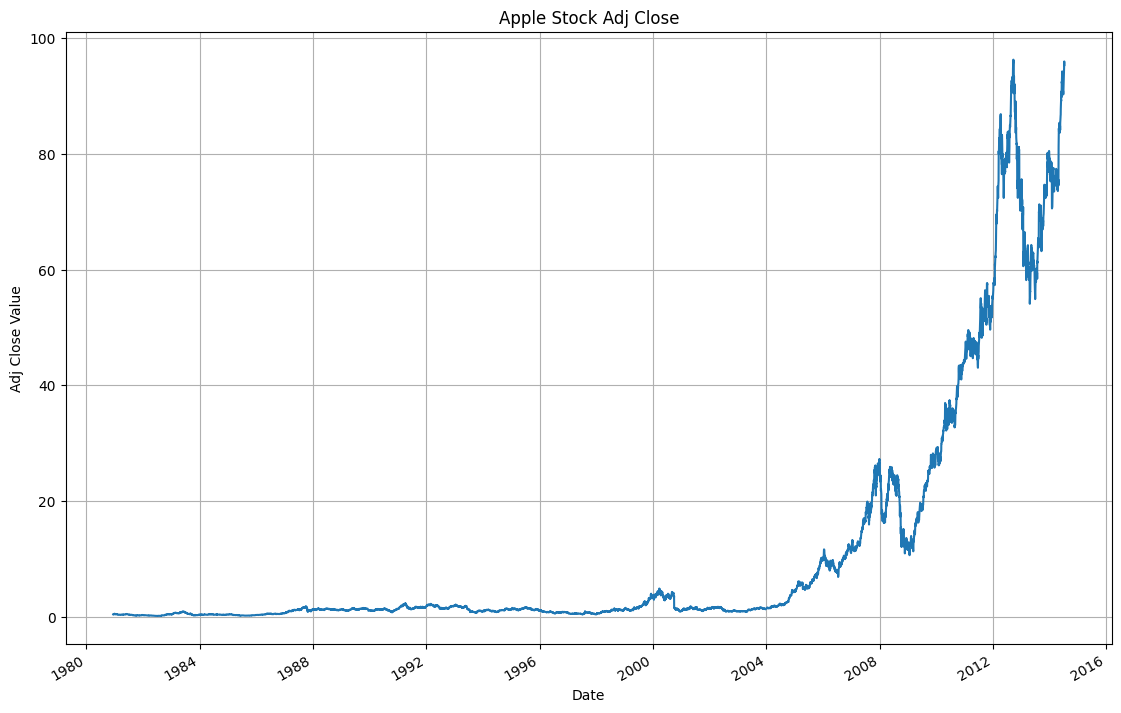

In [19]:
import matplotlib.pyplot as plt

# Plot 'Adj Close' values
plt.figure(figsize=(13.5, 9))
apple['Adj Close'].plot()
plt.title('Apple Stock Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close Value')
plt.grid(True)
plt.show()